In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)

In [2]:
df = pd.read_csv('df.csv')
# These fix formatting issues.
df.drop('Unnamed: 0', axis=1, inplace=True)
df['starttime'] = df['starttime'].apply(lambda x: x[1:-1].split(','))
df['month'] = df['starttime'].apply(lambda x: int(x[1]))

In [60]:
# import pickle
# filename = "bikedata.pickle"
# with open(filename, 'rb') as f:
#     data_final = pickle.load(f)
# new = [data_final[0][i][j] for i in range(len(data_final[0])) for j in range(6)]
# date_time = [new[i:i + 6] for i in range(0, len(new), 6)]
# df['starttime'] = date_time
# df.to_csv('df.csv')

### Your task is to find a way to reliably identify which routes (if any) show changes.

In [3]:
df.head()

,starttime,duration,bikenum,station_start,start_addy,addy_end,station_end,member,days_since_Jan1_2010,day_of_week,month
0,"[2010, 9, 20, 11, 27, 4]",1012,742.0,31208,M St & New Jersey Ave SE,4th & M St SW,31108,True,262,Monday,9
1,"[2010, 9, 20, 11, 41, 22]",61,32.0,31209,1st & N St SE,1st & N St SE,31209,True,262,Monday,9
2,"[2010, 9, 20, 12, 5, 37]",2690,993.0,31600,5th & K St NW,19th St & Pennsylvania Ave NW,31100,True,262,Monday,9
3,"[2010, 9, 20, 12, 6, 5]",1406,344.0,31600,5th & K St NW,Park Rd & Holmead Pl NW,31602,True,262,Monday,9
4,"[2010, 9, 20, 12, 10, 43]",1413,883.0,31100,19th St & Pennsylvania Ave NW,15th & P St NW,31201,True,262,Monday,9


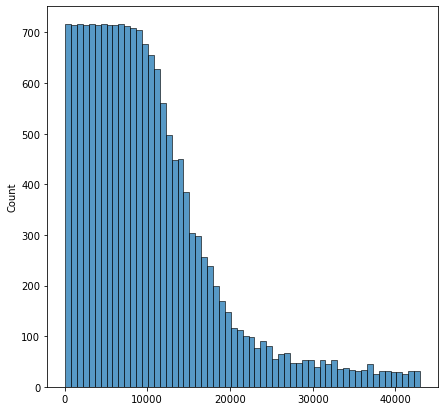

In [34]:
sns.histplot(df.duration.unique());

In [28]:
print(sum(df['duration'] > 43000))
print(sum(df['duration'] > 43000) / sum(df['duration']))

960
6.02988204904384e-07


This can bias our models and in fact it already is biasing it. These are outliers that could also have high leverage. doesn't make sense that a bike could be gone for over 22 hours. We should remove everything greater than 12 hours. 

In [30]:
df = df[df['duration'] < 43000]

In [ ]:
sns.histplot(df.duration.unique());

<AxesSubplot:title={'center':'Average duration for one route by month'}, xlabel='month'>

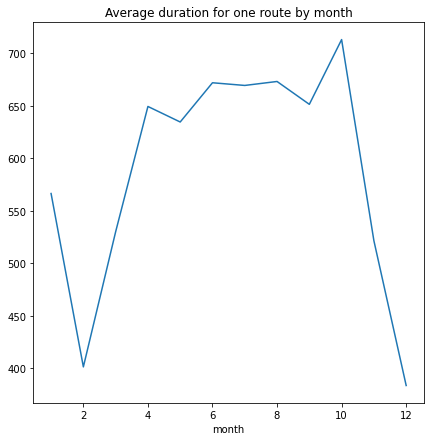

In [42]:
route = df[(df['station_start'] == 31200) & (df.station_end == 31201)]


plt.title('Average duration for one route by month')
route.groupby('month')['duration'].mean().plot()

In [44]:
df.groupby('member')['duration'].mean()
# So there is definitely a difference in riding times for members and non-members.

member
False    2687.735746
True      752.534846
Name: duration, dtype: float64

In [3]:
sum((df['station_start'] == 31200) & (df.station_end == 31201))

3674

In [36]:
df['station_start'].value_counts()

31200    54146
31201    36613
31104    34097
31623    33579
31214    31294
         ...  
31707        5
31266        4
31806        2
31052        1
31708        1
Name: station_start, Length: 144, dtype: int64

In [37]:
df['station_end'].value_counts()

31200    59484
31201    40657
31623    33991
31214    32390
31104    29765
         ...  
31706       28
31704        9
31707        4
31708        1
31806        1
Name: station_end, Length: 144, dtype: int64